### Projeto desenvolvido

##### Segue abaixo a sequência do projeto

 Análise Exploratória dos Dados

1. Realização de análise inicial dos dados:
   - Verificação a distribuição das variáveis (idade, renda, tempo no site, etc.).
   - Identificação valores ausentes ou inconsistências nos dados.
   - Exploração possíveis relações entre as variáveis independentes e a variável alvo (Compra).

Pré-processamento dos Dados

2. Pré-processamento dos Dados:
   - Normalizar ou padronizar variáveis numéricas, se necessário.
   - Realizar codificação para variáveis categóricas, transformando-as em valores numéricos.
   - Dividir os dados em conjuntos de treino e teste.

 Construção do Modelo de Classificação

3. Construção do Modelo de Classificação:
   - Treinar um modelo simples de classificação (Random Forest).
   - Avaliar o modelo utilizando métricas apropriadas.

 Interpretação dos Resultados

4. Interpretação dos Resultados:
   - Identificar quais variáveis mais influenciaram na decisão do modelo.
   - Explicar o desempenho do modelo e propor possíveis melhorias.

5. Extra:
- Implementações adicionais e insights inovadores.

Inicio do projeto

1. Realização de análise inicial dos dados

Utilizarei pandas para as primeiras análises

In [204]:
import pandas as pd

# Dados
data = pd.read_csv("Dataset.csv")

Entendimento e tratamento dos dados

In [205]:

print(data.info()) 
print(data.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB
None
   Idade  Renda Anual (em $)    Gênero  Tempo no Site (min) Anúncio Clicado  \
0   29.0             30000.0  Feminino             5.741706             Não   
1   58.0             50000.0  Feminino            21.885505             Sim   
2   50.0             70000.0  Feminino             6.121339             Não   
3   21.0            100000.0  Feminino            16.264925             Não   
4   59.0             50000.0  Femi

Organização do dataset e limpeza dos dados

In [206]:

print(data.isnull().sum())

Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64


In [207]:
data = data.dropna()
print(data.isnull().sum())

Idade                  0
Renda Anual (em $)     0
Gênero                 0
Tempo no Site (min)    0
Anúncio Clicado        0
Compra (0 ou 1)        0
dtype: int64


Limpeza de valores negativos errôneos

In [208]:

# Identificar e corrigir valores negativos nas colunas 'Idade' e 'Tempo no Site'
data = data[data['Idade'] > 0]
data = data[data['Tempo no Site (min)'] > 0]

Renomear algumas colunas para que facilite em futuras funções ( Não precisaria, apenas detalhe)

In [209]:
data.rename(columns={
    'Tempo no Site (min)': 'Tempo_Site',
    'Idade': 'Idade',
    'Renda Anual (em $)': 'Renda_Anual',
    'Compra (0 ou 1)': 'Compra',
    'Gênero': 'Genero',
    'Anúncio Clicado': 'Anuncio_Clicado'
}, inplace=True)
print(data.columns)

Index(['Idade', 'Renda_Anual', 'Genero', 'Tempo_Site', 'Anuncio_Clicado',
       'Compra'],
      dtype='object')


Converter tipos de variáveis

In [210]:

# Convertendo tipos de dados
data['Compra'] = data['Compra'].astype(int)

#  Codificar variáveis categóricas
data['Genero'] = data['Genero'].map({'Feminino': 0, 'Masculino': 1}) 

print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            165 non-null    float64
 1   Renda_Anual      165 non-null    float64
 2   Genero           165 non-null    int64  
 3   Tempo_Site       165 non-null    float64
 4   Anuncio_Clicado  165 non-null    object 
 5   Compra           165 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 9.0+ KB
None


Após tratar os dados irei, começa as análises. No qual a análise descritiva inicial será apartir de:
- Ver estatísticas gerais sobre as variáveis numéricas
- Ver a distribuição da variável alvo "Compra"

In [211]:

print(data.describe())

print(data['Compra'].value_counts())

            Idade    Renda_Anual      Genero  Tempo_Site      Compra
count  165.000000     165.000000  165.000000  165.000000  165.000000
mean    39.254545   59515.151515    0.509091   17.994546    0.321212
std     12.829394   26221.524872    0.501439    7.191249    0.468364
min     18.000000   30000.000000    0.000000    5.052596    0.000000
25%     28.000000   30000.000000    0.000000   12.616978    0.000000
50%     39.000000   50000.000000    1.000000   18.312317    0.000000
75%     51.000000   70000.000000    1.000000   24.047671    1.000000
max     59.000000  100000.000000    1.000000   29.853484    1.000000
Compra
0    112
1     53
Name: count, dtype: int64


Visualização das Relações como a variável compra;
- Distribuição de "Compra" por variáveis categóricas (como "Gênero" e "Anúncio Clicado")
- Relação entre variáveis contínuas (como "Tempo_Site" e "Renda_Anual") e "Compra"
- Correlação entre variáveis contínuas
- Porém para essas análises vou ter que utilizar mais bibliotecas ( seaborn e matplotlib)

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

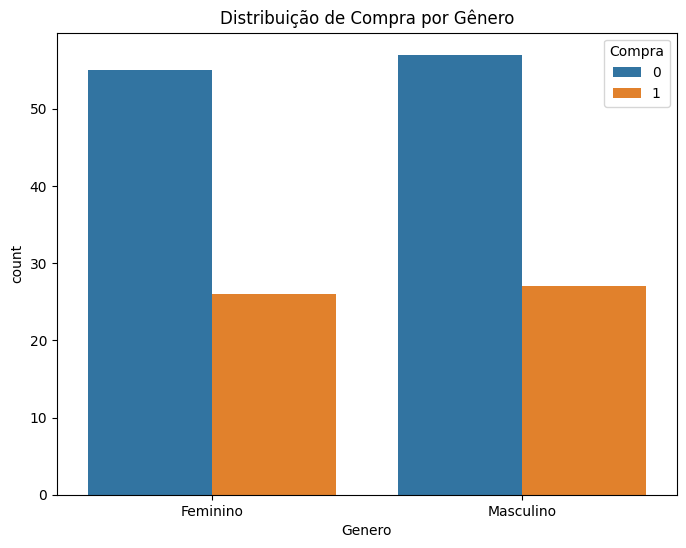

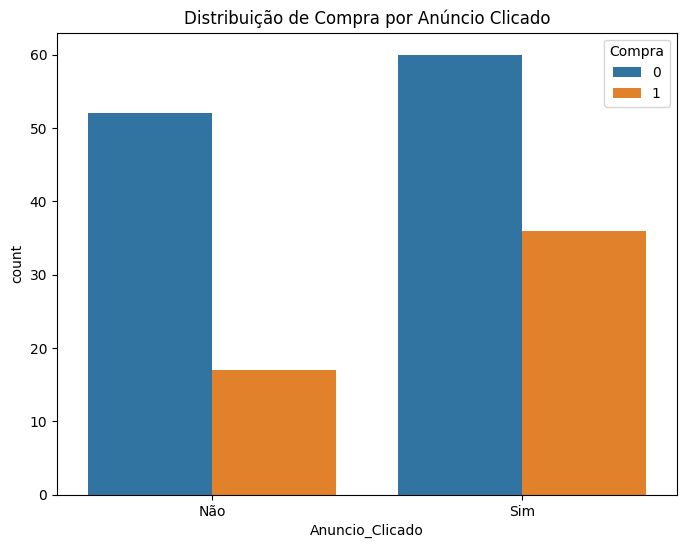

In [213]:
# Gráfico para a variável "Compra" por "Gênero"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Genero', hue='Compra')
plt.title('Distribuição de Compra por Gênero')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'])
plt.show()

# Gráfico para a variável "Compra" por "Anúncio Clicado"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Anuncio_Clicado', hue='Compra')
plt.title('Distribuição de Compra por Anúncio Clicado')

plt.show()

C:\Users\jvito\AppData\Local\Temp\ipykernel_7188\344803614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_tempo_site, y=mean_tempo_site.index, orient='h', palette='Blues')


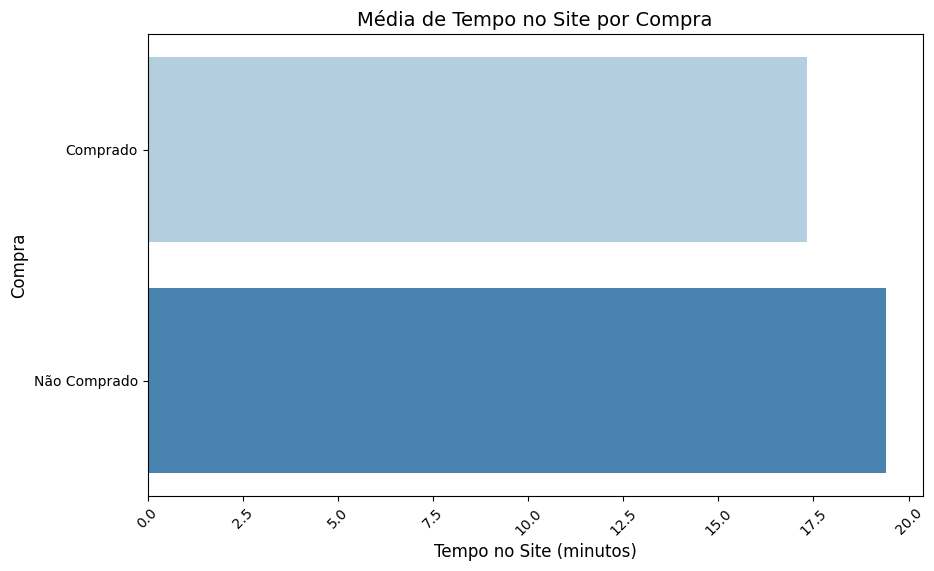

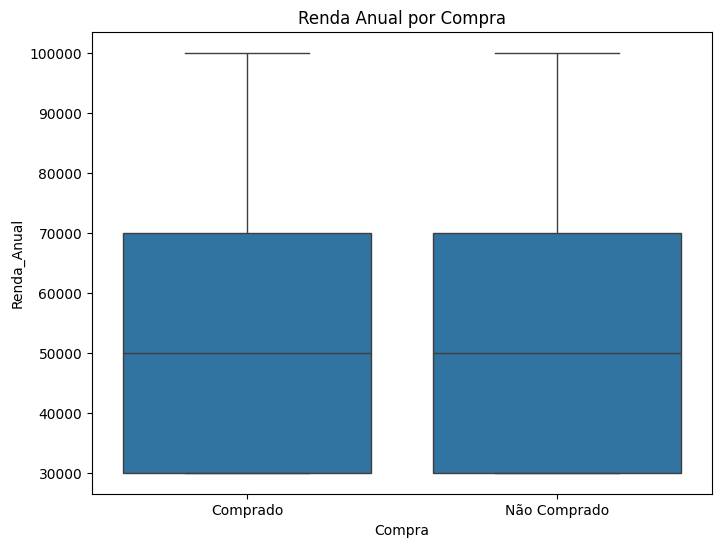

In [214]:
# Gráfico de dispersão de "Tempo_Site" por "Compra"
plt.figure(figsize=(10, 6))

mean_tempo_site = data.groupby('Compra')['Tempo_Site'].mean()

sns.barplot(x=mean_tempo_site, y=mean_tempo_site.index, orient='h', palette='Blues')

plt.title('Média de Tempo no Site por Compra', fontsize=14)
plt.xlabel('Tempo no Site (minutos)', fontsize=12)
plt.ylabel('Compra', fontsize=12)
plt.xticks(rotation=45)
plt.yticks([0, 1], ['Comprado', 'Não Comprado'])  
plt.show()

# Gráfico de dispersão de "Renda_Anual" por "Compra"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Compra', y='Renda_Anual', data=data)
plt.title('Renda Anual por Compra')
plt.xticks(ticks=[0, 1], labels=['Comprado', 'Não Comprado'])
plt.show()

In [215]:
# Calcular a matriz de correlação entre as variáveis contínuas
corr = data[['Tempo_Site', 'Idade', 'Renda_Anual']].corr()
corr_table = pd.DataFrame(corr)
print(corr_table)

             Tempo_Site     Idade  Renda_Anual
Tempo_Site     1.000000  0.133721    -0.227467
Idade          0.133721  1.000000     0.007438
Renda_Anual   -0.227467  0.007438     1.000000


Em seguida, realização de testes estatísticos. Afim de encontrar relações significativas.

In [216]:
from scipy.stats import ttest_ind

In [217]:
#Teste para comparar "Tempo_Site" entre as duas classes de "Compra"
compra = data[data['Compra'] == 1]['Tempo_Site']
nao_compra = data[data['Compra'] == 0]['Tempo_Site']

t_stat, p_val = ttest_ind(compra, nao_compra)
print(f'Teste T para Tempo_Site: T-statistic = {t_stat}, P-value = {p_val}')

# Teste para comparar "Renda_Anual" entre as duas classes de "Compra"
compra_renda = data[data['Compra'] == 1]['Renda_Anual']
nao_compra_renda = data[data['Compra'] == 0]['Renda_Anual']

t_stat_renda, p_val_renda = ttest_ind(compra_renda, nao_compra_renda)
print(f'Teste T para Renda_Anual: T-statistic = {t_stat_renda}, P-value = {p_val_renda}')

Teste T para Tempo_Site: T-statistic = 1.7332704709681954, P-value = 0.08493869481714775
Teste T para Renda_Anual: T-statistic = -0.7894403796464088, P-value = 0.4310015014812093


Análise de Variância para variáveis categóricas

In [218]:
from scipy.stats import f_oneway

In [219]:
anova_result = f_oneway(
    data[data['Genero'] == 'Masculino']['Compra'],
    data[data['Genero'] == 'Feminino']['Compra']
)
print(f'ANOVA para Gênero: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}')

ANOVA para Gênero: F-statistic = nan, P-value = nan


C:\Users\jvito\AppData\Local\Temp\ipykernel_7188\3840860246.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = f_oneway(


Observa-se que não a diferença significativa entre masculino e feminino, resultado >0.5

# 2. Pré-processamento de dados 

Preparação dos dados:
Adicionarei mais duas bibliotecas

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [221]:
# Separando as variáveis independentes (X) e a variável alvo (y)
X = data.drop(columns=['Compra'])
y = data['Compra']

In [222]:
# Codificando variáveis categóricas
# Aqui estamos usando LabelEncoder para as variáveis categóricas (como 'Genero', 'Anuncio_Clicado')
encoder = LabelEncoder()

categorical_columns = ['Genero', 'Anuncio_Clicado'] 
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])
    

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Utilização do Random Forest

Treinamento do Modelo Random Forest:
- Usarei a classe RandomForestClassifier

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Avaliação do Modelo

In [225]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


###### acurácia, precisão, recall, e F1-score.
- Acurácia: É a medida de quão frequentemente o modelo está correto.

- Precisão: Indica a exatidão das previsões positivas do modelo.

- Recall: Mede a capacidade do modelo de identificar corretamente todos os casos positivos.

- F1-score: É a média harmônica entre precisão e recall.

In [226]:
# Previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.4f}')

# Relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.6667
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.95      0.78        21
           1       0.67      0.17      0.27        12

    accuracy                           0.67        33
   macro avg       0.67      0.56      0.53        33
weighted avg       0.67      0.67      0.60        33

Matriz de Confusão:
[[20  1]
 [10  2]]


Ajustando os Hiperparâmetros

In [227]:
from sklearn.model_selection import GridSearchCV

In [228]:
# Definindo o grid de parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializando o GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Treinando o modelo com busca em grid
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f'Melhores parâmetros: {grid_search.best_params_}')

# Avaliando o modelo com os melhores parâmetros
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Acurácia e relatório para o modelo otimizado
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Acurácia do modelo otimizado: {accuracy_best:.4f}')
print('Relatório de Classificação (Modelo Otimizado):')
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Acurácia do modelo otimizado: 0.6061
Relatório de Classificação (Modelo Otimizado):
              precision    recall  f1-score   support

           0       0.62      0.95      0.75        21
           1       0.00      0.00      0.00        12

    accuracy                           0.61        33
   macro avg       0.31      0.48      0.38        33
weighted avg       0.40      0.61      0.48        33



Importância de variavéis

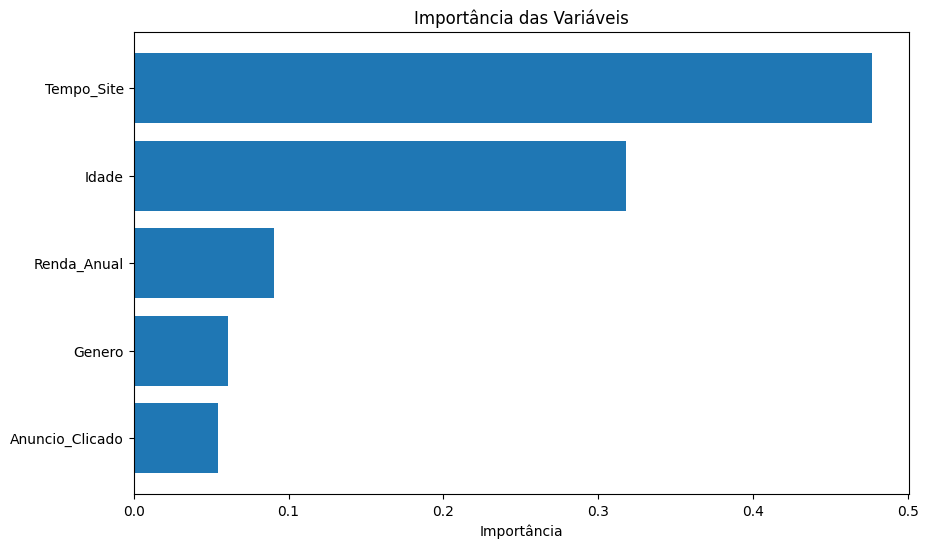

In [229]:

importances = rf_model.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Importância")
plt.show()

# 4 . Interpretação dos resultados

* Interpretação:
- Após o Random Forest é notório que o que mais influência do tempo de compra é o tempo no site seguido de idade, como observado no último gráfico (Importância das variáveis).
- Porém, em relação ao desempenho modelo está funcionando razoavelmente bem para identificar os casos "Comprado" (classe 0), mas tem um desempenho fraco para "Não Comprado" (classe 1), devido ao desequilíbrio de classes.
* Melhoria:
- Para melhoria poderia utilizar a aplicação SMOTE, para fazer o balanceamento, melhoria sim, só que os dados deveriam estar mais precisos com outros parâmetros para uma análise mais robusta e correta

## 5. Implementações adicionais e insights inovadores.

Visualização de Atribuição de Anúncios

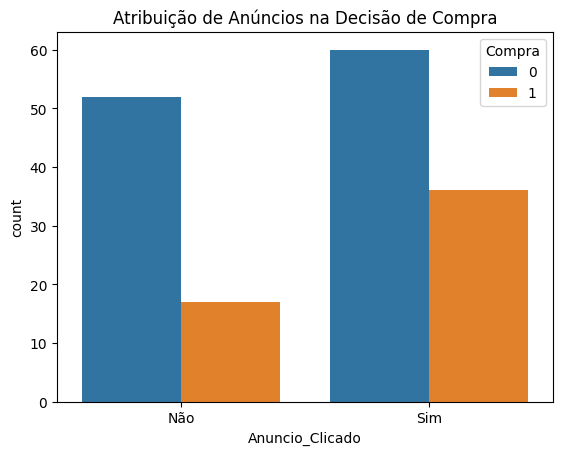

In [230]:
sns.countplot(data=data, x='Anuncio_Clicado', hue='Compra')
plt.title('Atribuição de Anúncios na Decisão de Compra')
plt.show()

Análise de Tempo de Navegação

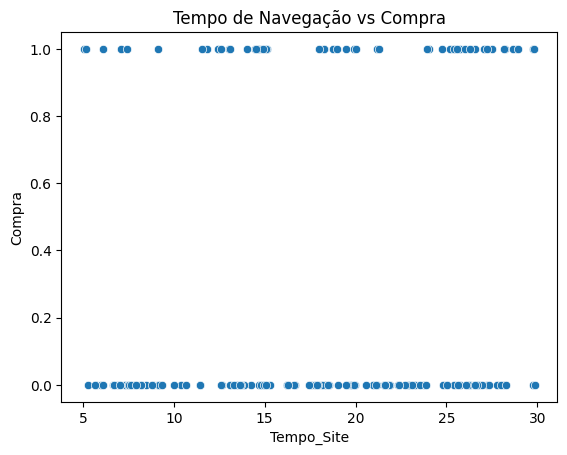

In [231]:
sns.scatterplot(x='Tempo_Site', y='Compra', data=data)
plt.title('Tempo de Navegação vs Compra')
plt.show()

Segmentação de usuários

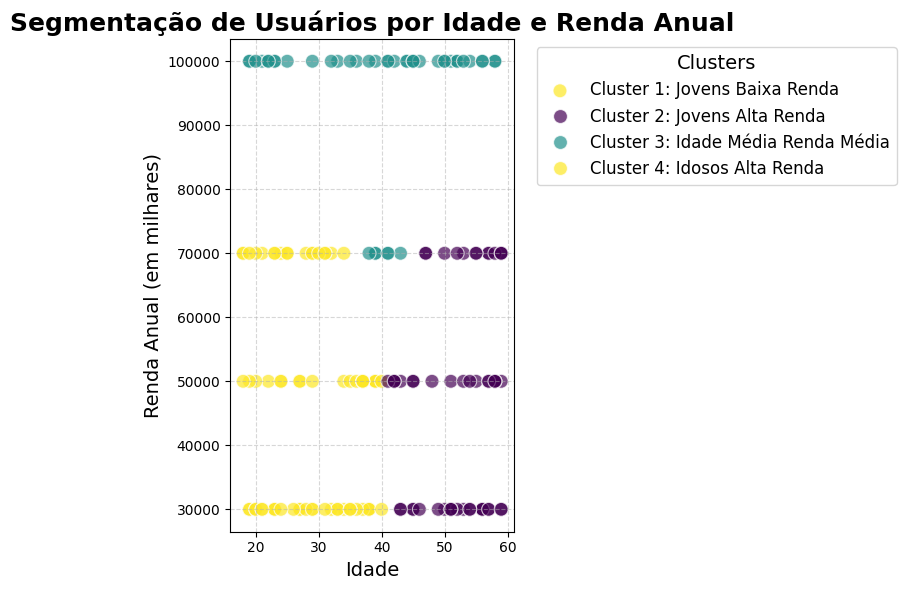

In [232]:
from sklearn.cluster import KMeans
# Normalizando os dados
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[['Idade', 'Renda_Anual']])

# Aplicando o K-means para criar clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Definindo o número de clusters como 3
data['Cluster'] = kmeans.fit_predict(data_normalized)

# Definir o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Gráfico de dispersão com a segmentação de clusters
sns.scatterplot(x='Idade', y='Renda_Anual', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.7)

# Melhorando o título e rótulos
plt.title('Segmentação de Usuários por Idade e Renda Anual', fontsize=18, fontweight='bold')
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Renda Anual (em milhares)', fontsize=14)

# Ajustando a legenda explicativa ao lado
plt.legend(title='Clusters', title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1), frameon=True)
plt.legend(
    title='Clusters', 
    title_fontsize=14, 
    fontsize=12, 
    loc='upper left', 
    bbox_to_anchor=(1.05, 1),
    frameon=True,
    labels=['Cluster 1: Jovens Baixa Renda', 'Cluster 2: Jovens Alta Renda', 'Cluster 3: Idade Média Renda Média', 'Cluster 4: Idosos Alta Renda']  # Exemplo de descrição dos clusters
)

# Exibindo o gráfico com um grid
plt.grid(True, linestyle='--', alpha=0.5)

# Exibindo o gráfico
plt.tight_layout()  
plt.show()


Compras por (Idade x Renda)

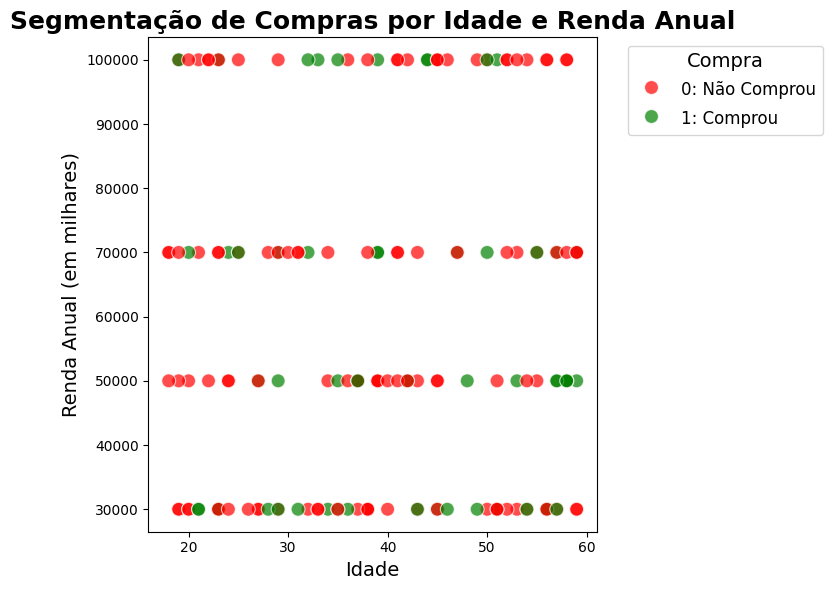

In [233]:

plt.figure(figsize=(8, 6))


sns.scatterplot(x='Idade', y='Renda_Anual', hue='Compra', data=data, palette={0: 'red', 1: 'green'}, s=100, alpha=0.7)


plt.title('Segmentação de Compras por Idade e Renda Anual', fontsize=18, fontweight='bold')
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Renda Anual (em milhares)', fontsize=14)


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['0: Não Comprou', '1: Comprou'], 
    title='Compra',
    title_fontsize=14,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    frameon=True,
    handlelength=2,  
    handleheight=1.5 
)


plt.tight_layout()


plt.show()

